<a href="https://colab.research.google.com/github/waelkabouk/deep_learning_exercises/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.10.0+cpu


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
print("1. Self driving cars")
print("2. Agriculture")
print("3. Security and Surveillance")

1. Self driving cars
2. Agriculture
3. Security and Surveillance


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [4]:
print("Overfitting occurs when a machine learning model learns the training data too well,\nincluding its noise and random fluctuations, causing it to perform poorly on new, unseen data.\nIn other words, the model memorizes the training dataset instead of learning general patterns.")

Overfitting occurs when a machine learning model learns the training data too well,
including its noise and random fluctuations, causing it to perform poorly on new, unseen data.
In other words, the model memorizes the training dataset instead of learning general patterns.


## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
print("""1. Regularization (L1 / L2):
   Regularization adds a penalty to large model weights, helping prevent the model from becoming too complex and memorizing noise in the training data.

2. Early Stopping:
   Early stopping monitors validation performance during training and stops the process once performance begins to degrade, preventing the model from overfitting.

3. Getting More Data (or Data Augmentation):
   Increasing the amount of training data helps the model learn general patterns rather than memorizing specific examples, improving its ability to generalize.
""")

1. Regularization (L1 / L2):
   Regularization adds a penalty to large model weights, helping prevent the model from becoming too complex and memorizing noise in the training data.

2. Early Stopping:
   Early stopping monitors validation performance during training and stops the process once performance begins to degrade, preventing the model from overfitting.

3. Getting More Data (or Data Augmentation):
   Increasing the amount of training data helps the model learn general patterns rather than memorizing specific examples, improving its ability to generalize.



## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [6]:
print('Done!')

Done!


## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [7]:
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

train_data = MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)


100%|██████████| 9.91M/9.91M [00:00<00:00, 42.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.16MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.2MB/s]


## 6. Visualize at least 5 different samples of the MNIST training dataset.

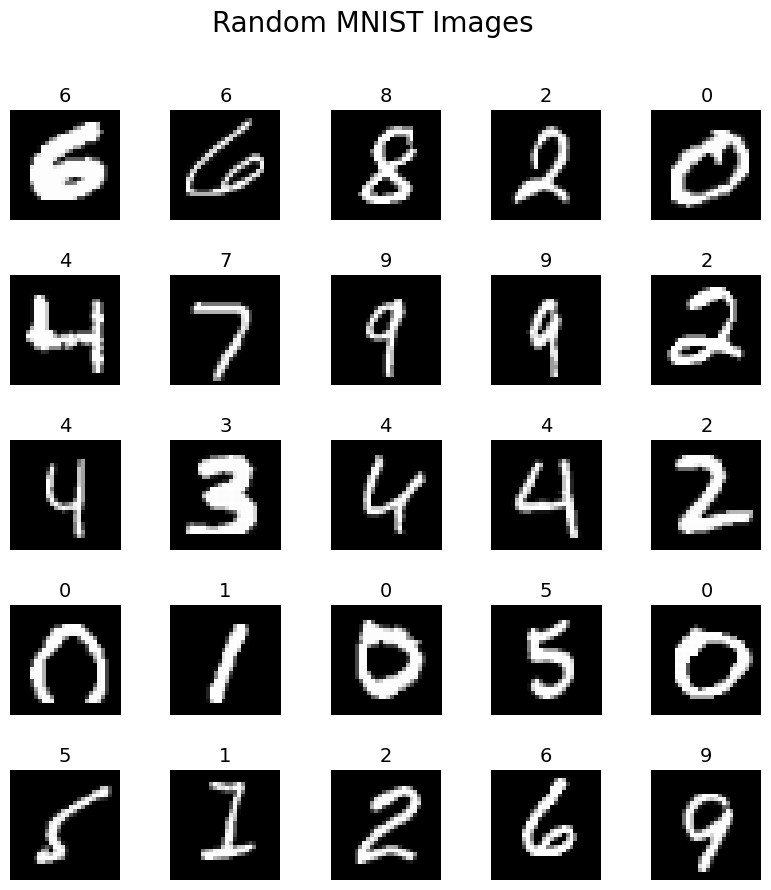

In [8]:
import matplotlib.pyplot as plt
torch.manual_seed(42)
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Random MNIST Images', fontsize=20)
rows, cols = 5,5
for i in range(1, cols * rows + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    plt.subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(label, fontsize=14)
    plt.axis(False)






## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7dd7f8dcbe00>, <torch.utils.data.dataloader.DataLoader object at 0x7dd7f8d5d190>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [10]:
from torch import nn
class MNISTModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1,padding=1 ),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
                                 nn.MaxPool2d(kernel_size=2, stride=2))
    self.block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1,padding=1 ),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                  )
    self.classifier = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=hidden_units*7*7, out_features=output_shape))
  def forward(self, x):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

model = MNISTModel(input_shape=1, hidden_units=10, output_shape=len(train_data.classes))
model


MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [11]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

In [12]:
def calculate_time(start: float, end: float) -> float:
    return end - start

In [13]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [14]:
def train_step(model: nn.Module, dataloader: torch.utils.data.DataLoader, optimizer: torch.optim.Optimizer, loss_fn: nn.Module, accuracy_fn, device: torch.device=device):

    train_loss, train_acc = 0, 0
    model.train()
    for batch, (X, y) in enumerate(dataloader):
      X.to(device)
      y.to(device)
      y_logits = model(X)

      loss = loss_fn(y_logits, y)
      train_loss += loss
      train_acc += accuracy_fn(y_true=y, y_pred=y_logits.argmax(dim=1))

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch % 400 == 0:
          print(f"Looked at {batch * len(X)}/{len(dataloader.dataset)} samples")

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [15]:
def test_step(model: nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: nn.Module, accuracy_fn, device: torch.device=device):

    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
      for batch, (X,y) in enumerate(dataloader):
        X.to(device)
        y.to(device)
        test_logits = model(X)

        loss = loss_fn(test_logits, y)
        test_loss += loss
        test_acc += accuracy_fn(y_true=y, y_pred=test_logits.argmax(dim=1))

        if batch % 400 == 0:
          print(f"Looked at {batch * len(X)}/{len(dataloader.dataset)} samples")
      test_loss /= len(dataloader)
      test_acc /= len(dataloader)
      print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [17]:
print("Testing on CPU:")
torch.manual_seed(42)
start = timer()
for epoch in tqdm(range(5)):
  print(f"Epoch: {epoch}\n---------")
  print('Training..')
  train_step(model=model, dataloader=train_dataloader, optimizer=optimizer, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device='cpu')
  print("Testing..")
  test_step(model=model, dataloader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device='cpu')
end = timer()
print(f"Time taken on CPU: {calculate_time(start=start, end=end):.3f}s")


Testing on CPU:


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Training..
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 1.11731 | Train accuracy: 61.48%
Testing..
Looked at 0/10000 samples
Test loss: 0.19997 | Test accuracy: 94.03%
Epoch: 1
---------
Training..
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.16521 | Train accuracy: 95.24%
Testing..
Looked at 0/10000 samples
Test loss: 0.10364 | Test accuracy: 96.63%
Epoch: 2
---------
Training..
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.11140 | Train accuracy: 96.63%
Testing..
Looked at 0/10000 samples
Test loss: 0.08385 | Test accuracy: 97.23%
Epoch: 3
---------
Training..
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 2560

In [18]:
print("Testing on GPU:")
torch.cuda.manual_seed(42)
start = timer()
for epoch in tqdm(range(5)):
  print(f"Epoch: {epoch}\n---------")
  print('Training..')
  train_step(model=model, dataloader=train_dataloader, optimizer=optimizer, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device='cuda')
  print('Testing..')
  test_step(model=model, dataloader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device='cuda')
end = timer()
print(f"Time taken on GPU: {calculate_time(start=start, end=end):.3f}s")

Testing on GPU:


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Training..


AssertionError: Torch not compiled with CUDA enabled

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?